In [1]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from metadata import const

In [2]:
df = pd.read_csv('dataset/clean-sample-200000.csv')
df = shuffle(df)

In [3]:
zero_df = df.loc[df[const.class_label] == 0]
one_df = df.loc[df[const.class_label] == 1]

print("class zero = ", len(zero_df.index))
print("class one = ", len(one_df.index))

class zero =  98840
class one =  95346


In [4]:
features = [f for f in df.columns if f != const.class_label]
labels = ['benign', 'attack']
x = df[features]
y = df[const.class_label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
clf = tree.DecisionTreeRegressor(min_samples_split=20, random_state=0, max_depth=9)
clf.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=20, random_state=0)

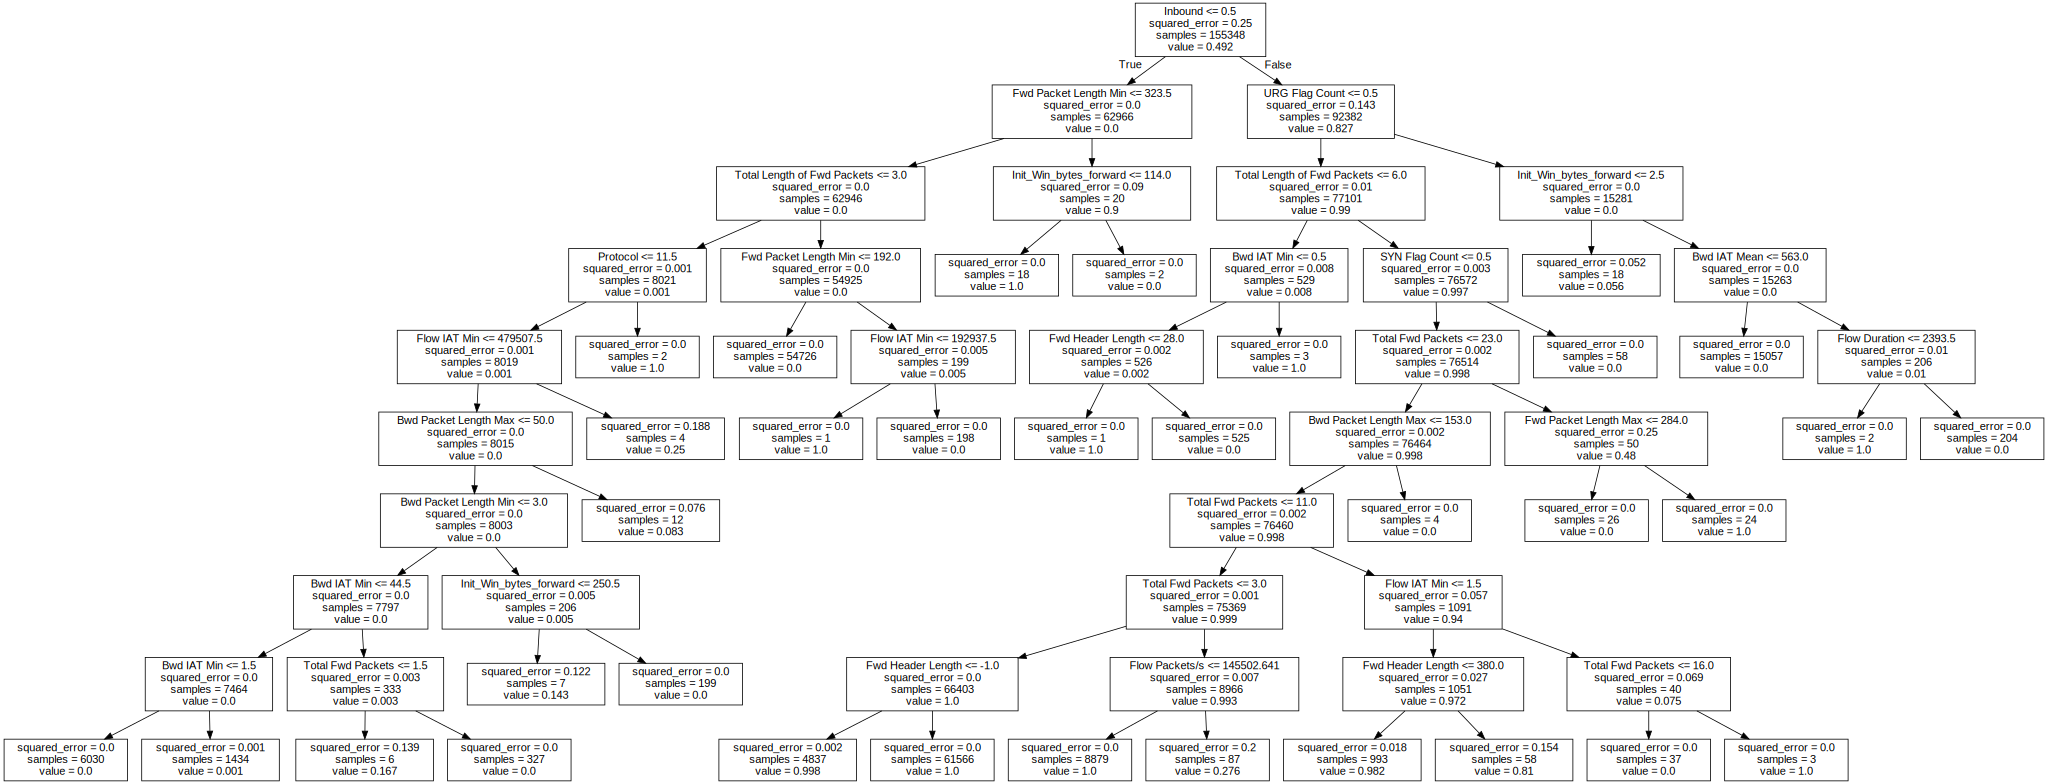

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features, class_names=['benign', 'attack'])
graph = graphviz.Source(dot_data)
graph.render(filename='decision-tree')
graph

In [7]:
print("train accuracy = ", clf.score(x_train, y_train))
score = clf.score(x_test, y_test)
print("test accuracy = ", score)

train accuracy =  0.9985253656929497
test accuracy =  0.9981574873167358


In [8]:
cm = confusion_matrix(y_test, clf.predict(x_test).astype('int32'))
print(cm)

[[19871     1]
 [ 1437 17529]]


In [9]:
precision_recall_fscore_support(y_test, clf.predict(x_test).astype('int32'), average='micro')

(0.962974406509089, 0.962974406509089, 0.962974406509089, None)

In [10]:
print(clf.get_depth())

9


In [11]:
top_features = []
for i in range(len(clf.feature_importances_)):
    top_features.append((clf.feature_importances_[i], x.columns[i]))
top_features.sort(reverse=True)
for f in top_features:
    print(f[1], "\t\t\t", f[0])

 Inbound 			 0.6591107295752262
 URG Flag Count 			 0.32246116597016955
Total Length of Fwd Packets 			 0.013268366800147178
 SYN Flag Count 			 0.0014883902650314254
 Flow Packets/s 			 0.001165313933792985
 Flow IAT Min 			 0.00083253125183545
 Total Fwd Packets 			 0.0005299342044077101
 Fwd Packet Length Min 			 0.0004177384388104898
 Fwd Packet Length Max 			 0.00032190695277935715
Bwd Packet Length Max 			 0.00010492752396826555
 Bwd IAT Min 			 7.673257676016037e-05
 Fwd Header Length 			 6.76486166078223e-05
 Protocol 			 5.151049385558433e-05
Init_Win_bytes_forward 			 5.141306548502969e-05
 Flow Duration 			 5.1086801692018975e-05
 Bwd IAT Mean 			 4.940911656644604e-07
 Bwd Packet Length Min 			 1.0943826504974002e-07
Fwd PSH Flags 			 0.0
Active Mean 			 0.0
 Init_Win_bytes_backward 			 0.0
 Idle Std 			 0.0
 Fwd Packet Length Std 			 0.0
 Flow IAT Mean 			 0.0
 Down/Up Ratio 			 0.0
 CWE Flag Count 			 0.0
 Bwd Packets/s 			 0.0
 Bwd Header Length 			 0.0
 Active Std 			 0